___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

- **import nltk**<br>NLTK, kullanım ve uygulama kolaylığı için önceden oluşturulmuş işlevlere ve yardımcı programlara sahip standart bir python kitaplığıdır. Doğal dil işleme (natural language processing) ve hesaplamalı dilbilim (computational linguistics) için en çok kullanılan kütüphanelerden biridir.

In [1]:
# source: 80.2.NLP-2 (NLP Application with ML)(TR)-13 Nov 2021
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20,10)
pd.set_option("display.max_columns", 46)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("WomensClothingECommerceReviews.csv", index_col = 0)
df = df.copy()
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Data Wrangling

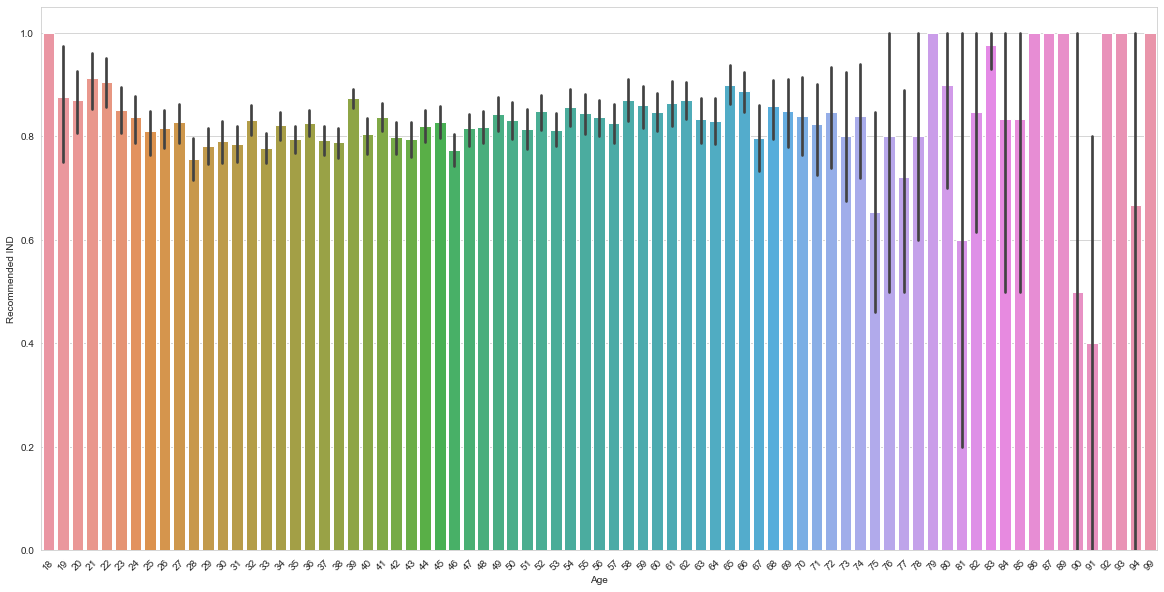

In [3]:
sns.barplot(data = df, x = "Age", y = "Recommended IND")
plt.xticks(rotation = 45);

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [4]:
df["Recommended IND"].value_counts(dropna = False)

1    19314
0     4172
Name: Recommended IND, dtype: int64

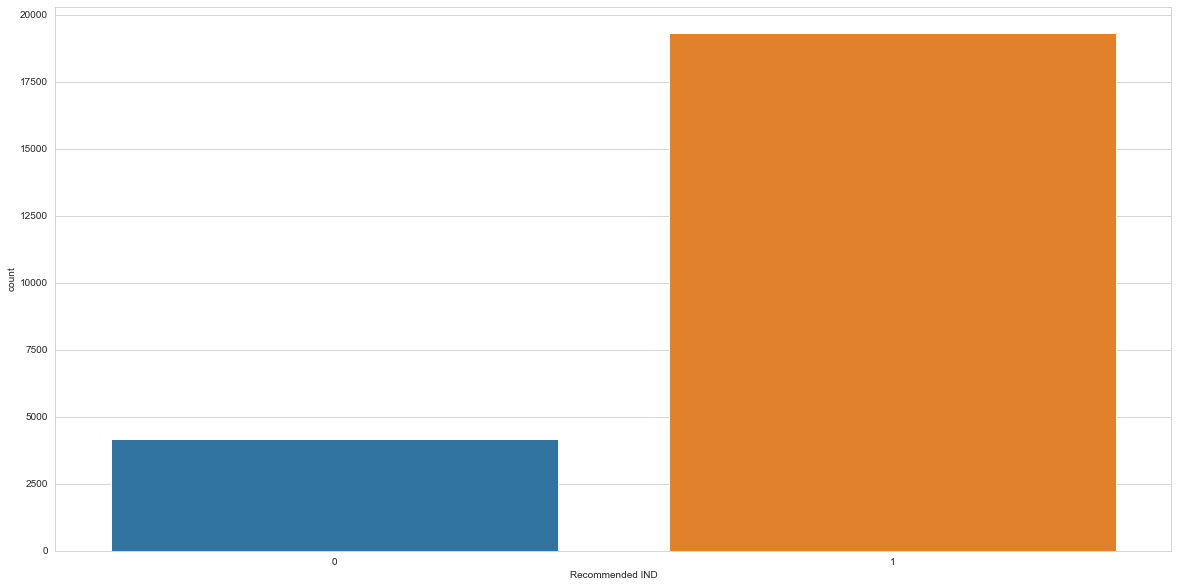

In [5]:
sns.countplot(data = df, x = "Recommended IND");

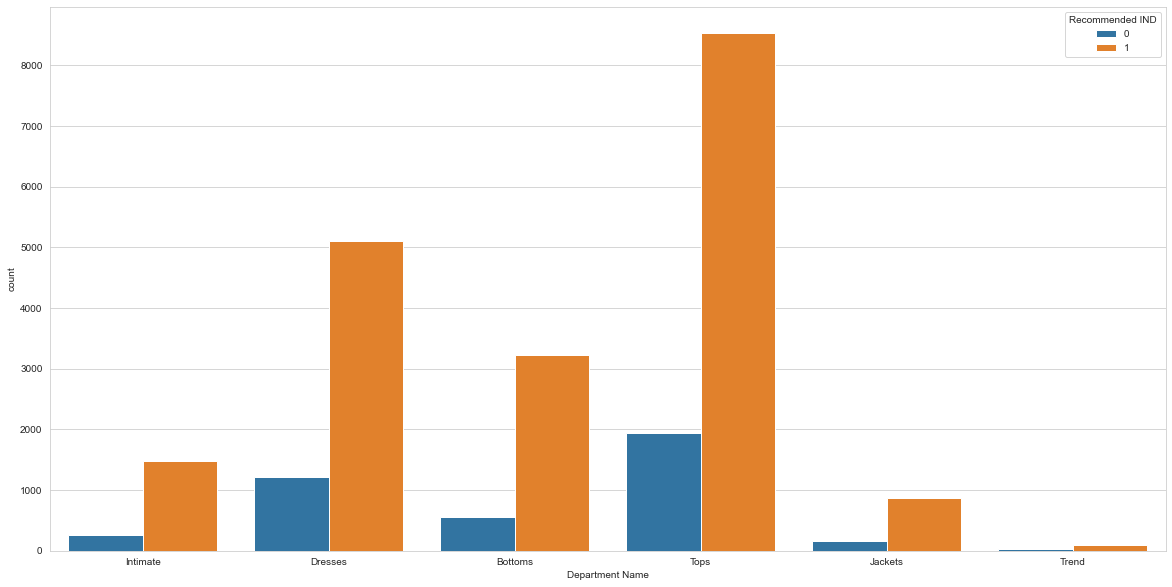

In [6]:
sns.countplot(data=df, x = "Department Name", hue = "Recommended IND");

In [7]:
fig = px.histogram(df.Age, marginal = "box", labels = {"value":"Age"})
fig.update_traces(marker=dict(line=dict(color="#000000", width=2)))
fig.update_layout(title_text="Age distribution of CUSTOMERS", title_x = .5, title_font = dict(size=20))
fig.show()

<IPython.core.display.Javascript object>

In [8]:
labels = ['Recommended', 'Not Recommended']
values = [df[df['Recommended IND'] == 1]['Recommended IND'].value_counts()[1],
          df[df['Recommended IND'] == 0]['Recommended IND'].value_counts()[0]]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Recommendations', title_x=0.5, title_font=dict(size=20))
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
fig = px.histogram(df['Age'], color=df['Recommended IND'],
                   labels={'value': 'Age',
                           'color': 'Recommended'}, marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

<IPython.core.display.Javascript object>

In [10]:
fig = px.histogram(df['Department Name'], color=df['Recommended IND'],
                   labels={'value': 'Department Name',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Department Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

<IPython.core.display.Javascript object>

In [11]:
fig = px.histogram(df['Division Name'], color=df['Recommended IND'],
                   labels={'value': 'Division Name',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Division Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

<IPython.core.display.Javascript object>

In [12]:
FreqOfWords = df['Review Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

<IPython.core.display.Javascript object>

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [13]:
df1 = df[["Review Text", "Recommended IND"]]
df1.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


---
---


### Missing Value Detection

In [15]:
df1.isna().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [16]:
df1 = df1.dropna(subset=['Review Text'], axis=0)
df1 = df1.reset_index(drop=True)

In [17]:
df1.isna().sum()

Review Text        0
Recommended IND    0
dtype: int64

In [18]:
df1.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [19]:
# jose portilla'nın kodu bu. İster kullan ister kullanma KARDEŞŞŞŞŞŞ
# isnull da görünmeyen boş string var ise;
# i --> index, rv --> review, lb --> label
blanks = []  # start with an empty list

for i,rv,lb in df1.itertuples():                   # iterate over the DataFrame
    if type(rv)==str and rv.isspace():             # avoid NaN values and test 'review' for whitespace
        blanks.append(i)
blanks

[]

In [20]:
# --> KONTROL ETMENİN DİĞER YOLU <--
# df1["Review Text"].str.isspace().sum()
# df1[df1["Review Text"].str.isspace() == True].index

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

### Convert to lowercase

In [21]:
df1['Review Text'] = df1['Review Text'].str.lower()
df1['Review Text'].head()

0    absolutely wonderful - silky and sexy and comf...
1    love this dress!  it's sooo pretty.  i happene...
2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
Name: Review Text, dtype: object

### Cleaning the StopWords

In [22]:
stop_words = stopwords.words("english")

In [23]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
     # ayraçları kaldırıyorum ki (can't gibi) olumsuzluk içeren kelimeler içinde ayraç içerdiği için stopwords lerde silinmesin.
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  # noktalama işaretlerinden temizleme
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  # stopword lerden temizleme
    # tokenleri teker teker al stopwords ler içinde yoksa olduğu gibi yaz, yani stopwords ise yazma.
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [24]:
df1["Review Text"] = df1["Review Text"].apply(cleaning)
df1["Review Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review Text, dtype: object

### Rare Words

In [25]:
" ".join(df1["Review Text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [26]:
rare_words = pd.Series(" ".join(df1["Review Text"]).split()).value_counts()
rare_words

# pandas fonksiyonlarını uygulayabilmem için öncelikle Series haline getiriyorum.

# hangi token kaç defa geçmiş. birazdan en az geçenleri rare_words e tanımlayacağım. 

dress         11352
fit           10128
size           9363
love           8992
top            8281
              ...  
earnings          1
justifying        1
enables           1
lui               1
nocal             1
Length: 11996, dtype: int64

In [27]:
rare_words = rare_words[rare_words <= 2] 

# 2 dahil diğer hepsini sil

In [28]:
rare_words.index

Index(['grail', 'sie', 'pallet', 'tossed', 'repeating', 'stare',
       'horizontally', 'waffled', 'sling', 'intensely',
       ...
       'quibb', 'glimmer', 'handwoven', 'hilary', 'drain', 'earnings',
       'justifying', 'enables', 'lui', 'nocal'],
      dtype='object', length=6497)

In [29]:
df1["Review Text"] = df1["Review Text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df1["Review Text"].head()
# her bir yorumu al, split le tokenlerine ayır, her birini nadir geçenlere ait olup olmadığına bak
  # değilse liste içine al ve df1["Review Text"] içinde onları topla

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review Text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [35]:
df1.sample(5)

Review Text  Recommended IND
8842   tank easy piece add summer wardrobe amazingly ...                1
14386  top always wait sale list pas love look people...                1
6569   adorable little top tank beautiful detailing c...                1
319    love tee material thick thick highly love slee...                1
17105  dress nice color well made style almost fit fr...                0

In [37]:
pos = df1[df1["Recommended IND"]==1]
pos.head()

Review Text  Recommended IND
0        absolutely wonderful silky sexy comfortable                1
1  love dress sooo pretty happened find store im ...                1
3  love love love jumpsuit fun flirty fabulous ev...                1
4  shirt flattering due adjustable front tie perf...                1
6  basket hte last see would look like person sto...                1

In [38]:
neg = df1[df1["Recommended IND"]==0]
neg.head()

Review Text  Recommended IND
2   high hope dress really wanted work initially o...                0
5   love tracy reese dress one petite foot tall us...                0
10  dress run small esp zipper area run ordered sp...                0
22  first pullover styling side zipper wouldnt pur...                0
25  loved material didnt really look long dress pu...                0

In [39]:
len(pos),len(neg)

(18540, 4101)

### Collect Words (positive and negative separately)

In [40]:
all_words_pos = " ".join(pos["Review Text"])  # tüm cümleleri birleştir.

In [41]:
all_words_neg = " ".join(neg["Review Text"])  # tüm cümleleri birleştir.

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [42]:
from wordcloud import WordCloud

In [45]:
wordcloud = WordCloud(background_color="white", max_words =250)  # The maximum number of words. 
wordcloud.generate(all_words_pos)

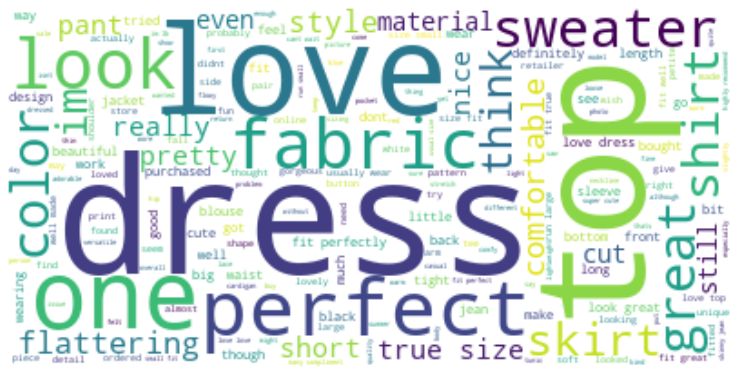

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

In [47]:
wordcloud = WordCloud(background_color="white", max_words =250)  # The maximum number of words. 
wordcloud.generate(all_words_neg)

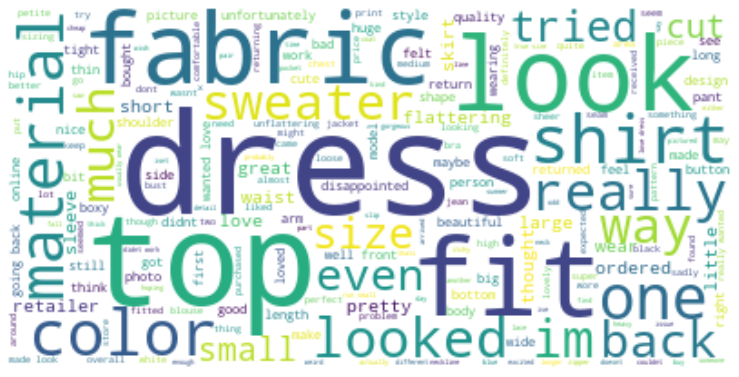

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df1["Review Text"]
y= df1["Recommended IND"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)  # fit ile  X_trainde geçen unique tüm tokenleri tespit ediyor ve transform ile onları sayıyor
X_test_count = vectorizer.transform(X_test)  # X_train de eğitildiği için X_train de geçme durumuna göre X_test'te sayma işlemini yapar.
                                            # X_testte geçen bir token, eğitildiği X_train de yok ise onu yok sayar, işlem yapmaz
    
# demek ki X_train yeterince büyük olmalı ki X_test içinde geçen tüm tokenler için sayma işlemini yapsın, kelime atlamasın. 

### TF-IDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [56]:
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score

In [57]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model,X_test, y_test)

## Logistic Regression

### CountVectorizer

In [309]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = .1, max_iter=1000, penalty = "l2", class_weight= "balanced") #class_weight='balanced'
log.fit(X_train_count,y_train)

# Hoca, overfit i çözmek için C skoru ile oynandığını ve en uygun skorun 0.02 olduğunu bulduğunu söyledi. iter'i de arttırmış.

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.85      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.84     18112
weighted avg       0.92      0.89      0.90     18112



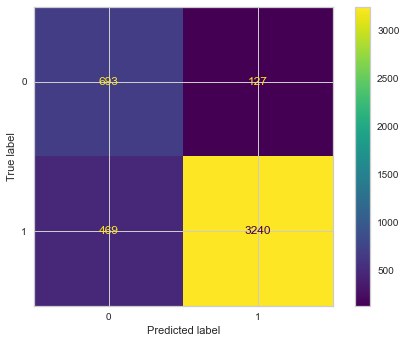

In [310]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

In [73]:
from yellowbrick.classifier import PrecisionRecallCurve

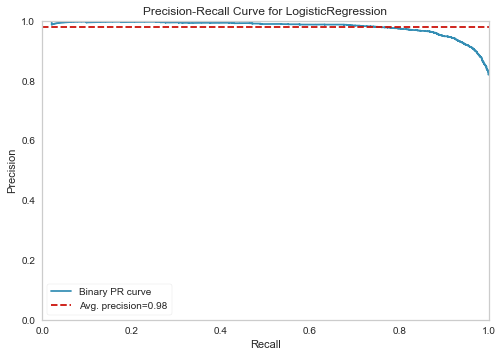

In [311]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = .1, max_iter=1000, penalty = "l2", class_weight= "balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [312]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_AP_neg = viz.score_

### TF-IDF

In [313]:
log = LogisticRegression(C = 1, max_iter=1000, penalty = "l2", class_weight= "balanced") #class_weight='balanced'
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       820
           1       0.97      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.87      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      3281
           1       0.98      0.88      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.84     18112
weighted avg       0.92      0.89      0.90     18112



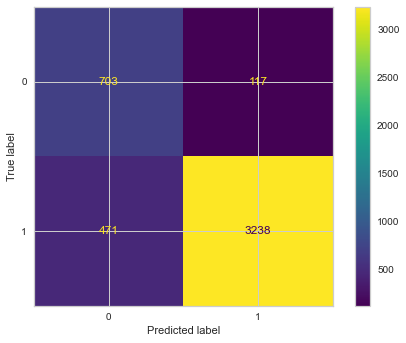

In [314]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

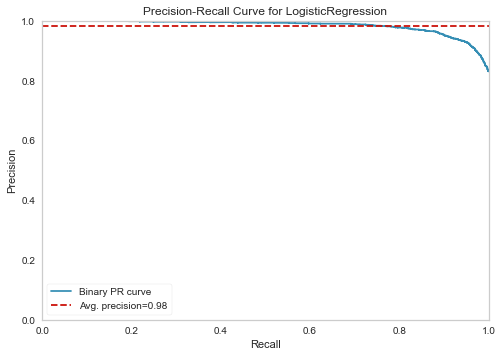

In [315]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter=1000, penalty = "l2", class_weight= "balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [316]:
y_pred = log.predict(X_test_tf_idf)
log_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_tf_idf_AP_neg = viz.score_

## Naive Bayes 

### Countvectorizer

In [88]:
from sklearn.naive_bayes import MultinomialNB # BernoulliNB for binary model

# MultinomialNB, birden fazla label var ise bunun kullanılması tavsiye ediliyor.

# yine de multinomial ve bernoille den ikisini de deneyip hangisi daha iyi sonuç veriyorsa onunla devam etmek gerekiyor.
# (önceden denenmiş ve MulitnomialNB daha iyi çıkmış.)

In [305]:
nb_multi_count = MultinomialNB()
nb_multi_count.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.83      0.82      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



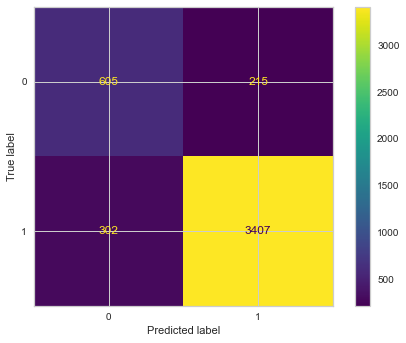

In [306]:
print("NB MODEL")
eval(nb_multi_count, X_train_count, X_test_count)

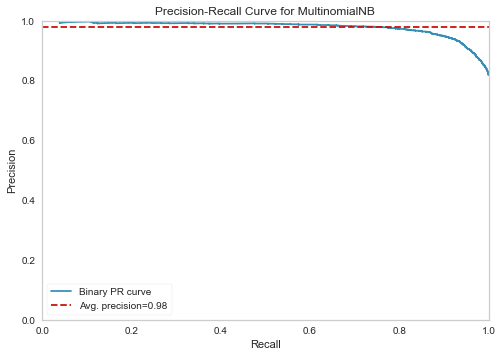

In [307]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb_multi_count.classes_,   # label ların isimleri ile gözükmesi için.. aksi halde isim yerine 0,1,2 diye gözükür 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

# datada dengesizlik (umbalance) söz konusu olduğu için skorlarım gerçekçi olsun diye viz = PrecisionRecallCurve u kullandım.

In [308]:
y_pred = nb_multi_count.predict(X_test_count)
nb_multi_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_multi_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_multi_count_AP_neg = viz.score_

### TF-IDF

In [170]:
nb_multi_tf_idf = MultinomialNB(alpha=0.01)
nb_multi_tf_idf.fit(X_train_tf_idf,y_train)

MultinomialNB(alpha=0.01)

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.80      0.29      0.43       820
           1       0.86      0.98      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.83      0.64      0.67      4529
weighted avg       0.85      0.86      0.83      4529

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.49      0.64      3281
           1       0.90      0.99      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.91      0.74      0.79     18112
weighted avg       0.90      0.90      0.89     18112



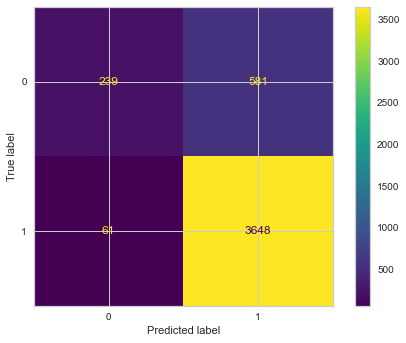

In [171]:
print("NB MODEL")
eval(nb_multi_tf_idf, X_train_tf_idf, X_test_tf_idf)  # tf -idf in kötü sonuç verdiği yer.

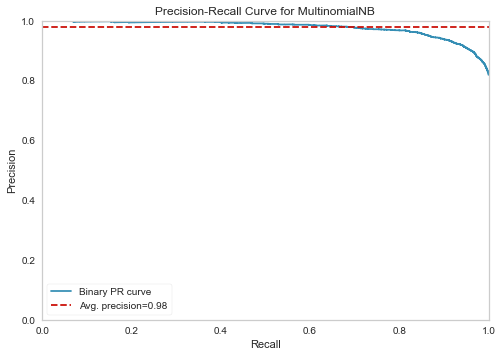

In [172]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb_multi_tf_idf.classes_,   # label ların isimleri ile gözükmesi için.. aksi halde isim yerine 0,1,2 diye gözükür 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

# datada dengesizlik (umbalance) söz konusu olduğu için skorlarım gerçekçi olsun diye viz = PrecisionRecallCurve u kullandım.

In [173]:
y_pred = nb_multi_tf_idf.predict(X_test_tf_idf)
nb_multi_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_multi_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_multi_tf_idf_AP_neg = viz.score_

## Navie Bayes Bernoulli
### Bernoulli Count Vectorizer

In [104]:
from sklearn.naive_bayes import BernoulliNB

In [107]:
nb_ber_count = BernoulliNB()
nb_ber_count.fit(X_train_count,y_train)

BernoulliNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      3281
           1       0.95      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



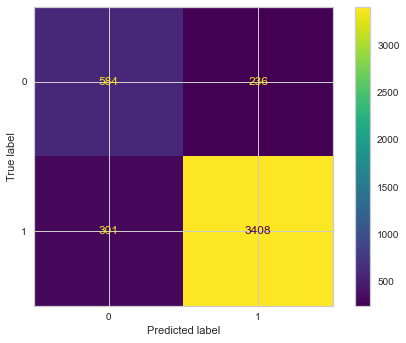

In [108]:
print("NB MODEL")
eval(nb_ber_count, X_train_count, X_test_count)

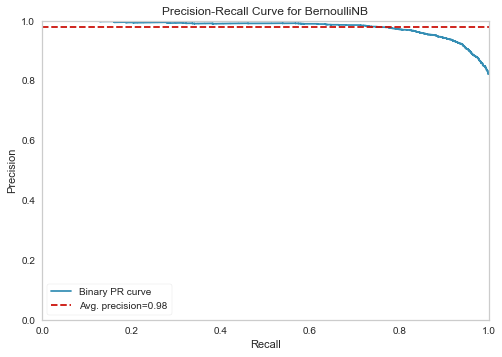

In [109]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb_ber_count.classes_,   # label ların isimleri ile gözükmesi için.. aksi halde isim yerine 0,1,2 diye gözükür 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

# datada dengesizlik (umbalance) söz konusu olduğu için skorlarım gerçekçi olsun diye viz = PrecisionRecallCurve u kullandım.

In [110]:
y_pred = nb_ber_count.predict(X_test_count)
nb_ber_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_ber_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_ber_count_AP_neg = viz.score_

### Bernoulli TF-IDF

In [111]:
nb_ber_tf_idf = BernoulliNB()
nb_ber_tf_idf.fit(X_train_tf_idf,y_train)

BernoulliNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      3281
           1       0.95      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



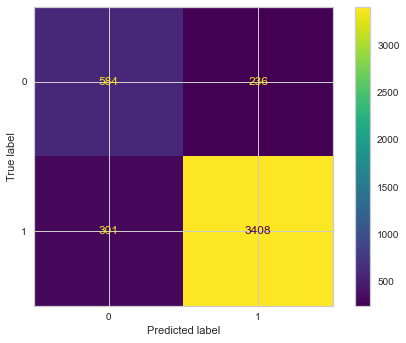

In [112]:
print("NB MODEL")
eval(nb_ber_tf_idf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb_ber_tf_idf.classes_,   # label ların isimleri ile gözükmesi için.. aksi halde isim yerine 0,1,2 diye gözükür 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

# datada dengesizlik (umbalance) söz konusu olduğu için skorlarım gerçekçi olsun diye viz = PrecisionRecallCurve u kullandım.

In [113]:
y_pred = nb_ber_tf_idf.predict(X_test_tf_idf)
nb_ber_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_ber_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_ber_tf_idf_AP_neg = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [141]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = .01)  
svc_count.fit(X_train_count,y_train)

LinearSVC(C=0.01)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       820
           1       0.91      0.96      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.84      0.76      0.79      4529
weighted avg       0.89      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.85      0.63      0.72      3281
           1       0.92      0.97      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.88      0.80      0.84     18112
weighted avg       0.91      0.91      0.91     18112



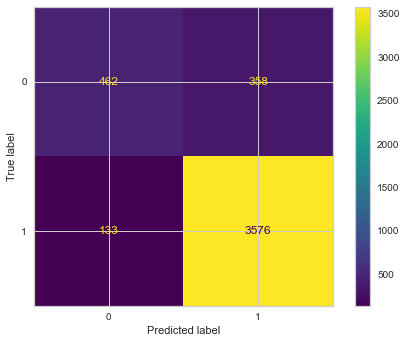

In [143]:
print("SVC MODEL")
eval(svc_count, X_train_count, X_test_count)

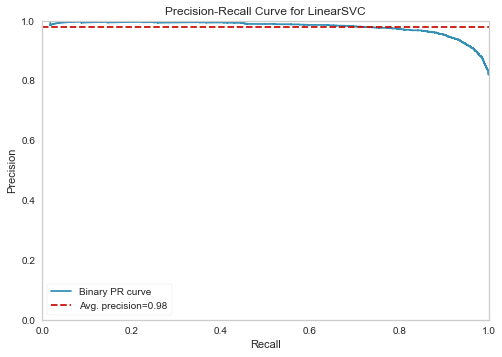

In [144]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc_count.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [145]:
y_pred = svc_count.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
svc_count_AP_neg = viz.score_

### TF-IDF

In [156]:
svc_tf_idf = LinearSVC(C = 1)  
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(C=1)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       820
           1       0.92      0.95      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.83      0.79      0.81      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      3281
           1       0.95      0.98      0.97     14831

    accuracy                           0.94     18112
   macro avg       0.92      0.88      0.90     18112
weighted avg       0.94      0.94      0.94     18112



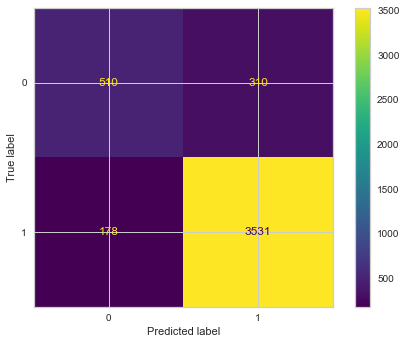

In [157]:
print("SVC MODEL")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

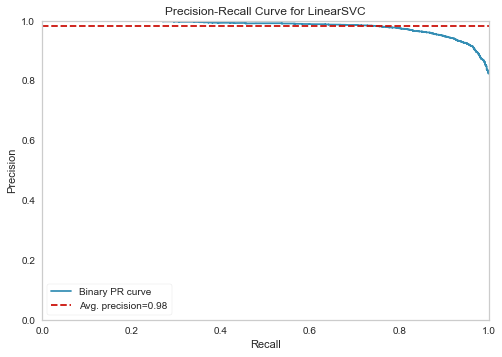

In [174]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [175]:
y_pred = svc_tf_idf.predict(X_test_tf_idf)
svc_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
svc_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
svc_tf_idf_AP_neg = viz.score_

## Random Forest

### Countvectorizer

In [180]:
from sklearn.ensemble import RandomForestClassifier
rf_count = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.78      0.65       820
           1       0.95      0.86      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.75      0.82      0.77      4529
weighted avg       0.88      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.85      0.71      3281
           1       0.96      0.88      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.87      0.82     18112
weighted avg       0.90      0.87      0.88     18112



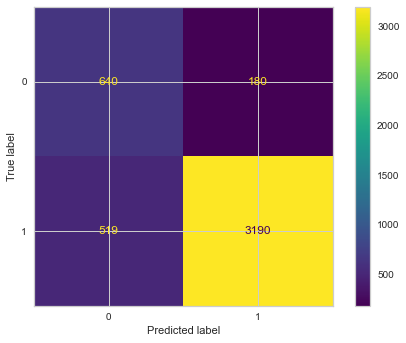

In [181]:
print("RF MODEL")
eval(rf_count, X_train_count, X_test_count)

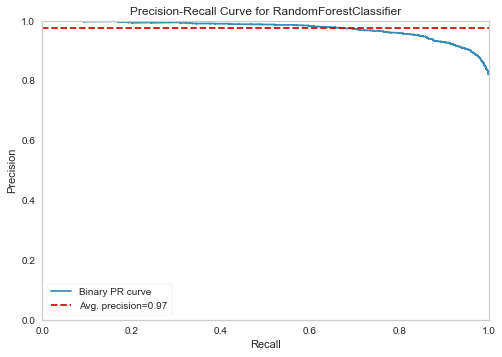

In [182]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced"),
    classes=rf_count.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [183]:
y_pred = rf_count.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_count_AP_neg = viz.score_

### TF-IDF

In [194]:
rf_tf_idf = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.76      0.62       820
           1       0.94      0.85      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.73      0.80      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.87      0.72      3281
           1       0.97      0.87      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.87      0.82     18112
weighted avg       0.90      0.87      0.88     18112



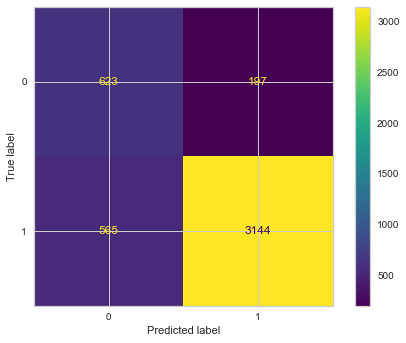

In [195]:
print("RF MODEL")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

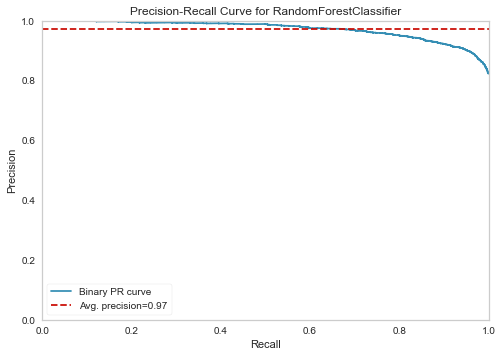

In [196]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced"),
    classes=rf_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [198]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
rf_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_tf_idf_AP_neg = viz.score_

## Ada Boosting

### Countvectorizer

In [203]:
from sklearn.ensemble import AdaBoostClassifier
ada_count = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada_count.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      3281
           1       0.93      0.96      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112



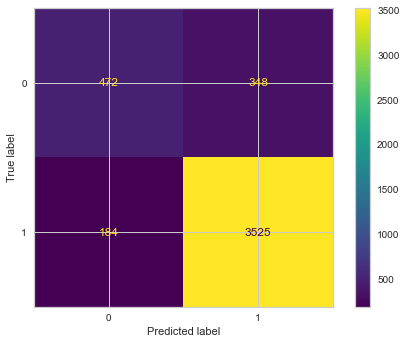

In [204]:
print("Ada MODEL")
eval(ada_count, X_train_count, X_test_count)

# burada precision ve recall ın dengeli (birbirine yakın) olduğunu gördüm. 
# f1-score un recall a yakın olması zaten precision ın da yakın olmasını gerektiriyor. 

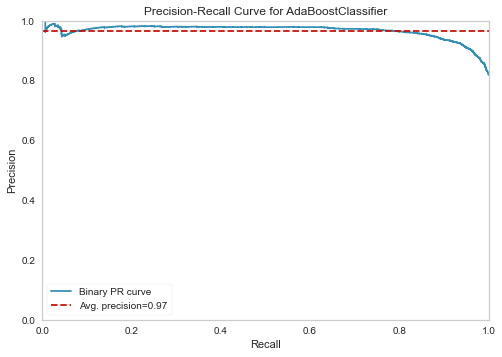

In [205]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada_count.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [207]:
y_pred = ada_count.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_count_AP_neg = viz.score_

### TF-IDF

In [208]:
ada_tf_idf = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.77      0.79      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      3281
           1       0.94      0.97      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



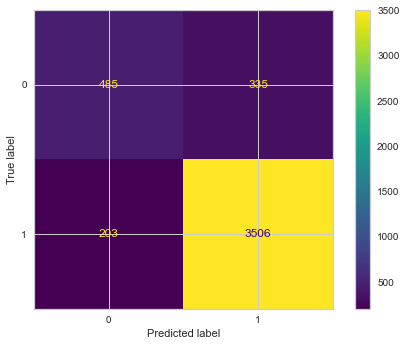

In [209]:
print("Ada MODEL")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

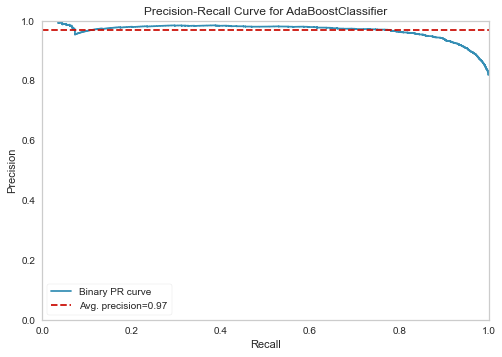

In [210]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [211]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
ada_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_tf_idf_AP_neg = viz.score_

## DL modeling

#### Libraries

In [212]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [213]:
df2 = pd.read_csv('WomensClothingECommerceReviews.csv')
df2.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [214]:
df2 = df2[["Review Text","Recommended IND"]]
df2.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [215]:
df2.dropna(inplace = True)

### Tokenization

In [219]:
X = df2['Review Text'].values
y = df2['Recommended IND'].values

In [268]:
num_words = 10000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
# Datasetimdeki bütün tokenler önemi değil. Bu tür duygu analizi veya sınıflandırma gibi algoritmalarda bütün tokenler kullanılmaz.
# Corpus'ta genellikle 10000 - 15000 civarı gibi kelime ile eğitim yapılır. Yeterlidir.
# Noktalama işaretlerinin çıkarılması ve özel karakterlerin çıkarılması yeterlidir. İsterseniz sayıları da çıkarabilirsiniz ama gerek yok.
# Ama çeviri yapacaksak (özellikle translate) default olan "NaN" tutulur. Hiçbir şeyi ayırmam.
# Zaten Google Translate'in eline kimse güncel durumda su dökemez.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'  numwords param deleted (small corpus)

In [269]:
tokenizer.fit_on_texts(X)

### Creating word index

In [270]:
tokenizer.word_index  # bunlar kullanım sayısı değil. Bunlar corpus'ta en fazla kullanılan tokenler in büyükten küçüğe doğru sıralaması. 

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [271]:
len(tokenizer.word_index)  # Benim yine modelim eğitim için en fazla kullanılan ilk 15000 tane token ı hafızasına aldı. Aşağıdaki sayı kafa karıştırmasın.

14847

- numwords 14000 altında olmalı ( eğer belirtilecekse)

### Converting tokens to numeric

In [272]:
X_num_tokens = tokenizer.texts_to_sequences(X)  # Benim yukarıki "tokenizer.word_index" numaraya göre, yorumlarımı numaraya çeviriyor.
                                                # Her tokenlerdeki sayısal karşılığı olan numarayı alıp, o numaraya dönüştürdü.

In [273]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [274]:
X_num_tokens

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  312,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  718,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3247,
  313,
  1,


### Maximum number of tokens for all documents¶

In [275]:
num_tokens.max()  # en uzun yorumumun kaç tokenli olduğu

116

In [276]:
num_tokens.mean()  # ortalama token sayısı

60.39287133960514

In [277]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

16263

In [278]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [279]:
num_tokens.argmin()

820

In [280]:
X[820]

'Great style!'

### Fixing token counts of all documents (pad_sequences)

In [281]:
max_tokens = 103

In [282]:
sum(num_tokens < max_tokens) / len(num_tokens)  # Yorumlarımın %95 sı 103 token sayısından az.
                                                # Bu sayı (max_tokens), %95 ten yukarı bir skor çıkaracak şekilde belirlenir.

0.9604699439070712

103 den küçük olanların eksik kalan kısımlarını 0 peddingi uyguulayacak.<br>
103 den fazla token sayılı yorumların son 103 tanesini alacak. Gerisini kırpacak

In [283]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [284]:
X_pad.shape

(22641, 103)

### Train Set Split

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)  # stratify = imbalance önlemek için.

### Modeling

In [287]:
model = Sequential()

In [288]:
embedding_size = 100  # benim modelime verdiğim o dizinlerin ,içerisinde hatırlarsanız her birinde 103 token olacak. O tokenlerin her birini 

In [289]:
model.add(Embedding(input_dim=num_words,        
                    output_dim=embedding_size,                                       
                    input_length=max_tokens,    # Benim modele 103 lük vektörler halinde girecek.
                    name='embedding_layer')) 

In [290]:
model.add(GRU(units=48, return_sequences=True))  # nöron sayıları 2 ve üzeri sayılar belirlemek best practise dir. Direkt 500 veya 100 de diyebilirdik.
model.add(GRU(units=24, return_sequences=True))  # "return_sequences=True" GRU modelleri dizinlere aktarırken true yaparız. bir sonraki katman LSTM veya GRU ise kullanılır. 
model.add(GRU(units=12))  # GRU veya LSTM olmadığı için "return_sequences=True" kullanmadık.
model.add(Dense(1, activation='sigmoid'))  # 0 veya 1 lerden oluşan çıktılar almam gerektiği için sigmoid kullandım.

In [291]:
optimizer = Adam(lr=0.004)

In [292]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [293]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 103, 100)          1000000   
_________________________________________________________________
gru_3 (GRU)                  (None, 103, 48)           21600     
_________________________________________________________________
gru_4 (GRU)                  (None, 103, 24)           5328      
_________________________________________________________________
gru_5 (GRU)                  (None, 12)                1368      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 1,028,309
Trainable params: 1,028,309
Non-trainable params: 0
_________________________________________________________________


In [294]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 5, restore_best_weights=True)  # restore_best_weights --> en iyi skoru yakalamak için kullanılır. 
                                                                                # yoksa patient sonundaki skoru verir.

In [295]:
pd.Series(y_train).value_counts(normalize=True) 

1    0.818849
0    0.181151
dtype: float64

In [296]:
weights = {0:818, 1:181}  # anlamadım. balance kullanılabilinir miydi? Class weight balance varsa dene

In [297]:
model.fit(X_train, y_train, epochs=25, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
71/71 [==============================] - 52s 620ms/step - loss: 134.9247 - recall: 0.7674 - val_loss: 0.3997 - val_recall: 0.8070
Epoch 2/25
71/71 [==============================] - 37s 522ms/step - loss: 86.0867 - recall: 0.8690 - val_loss: 0.3191 - val_recall: 0.8622
Epoch 3/25
71/71 [==============================] - 35s 493ms/step - loss: 60.4371 - recall: 0.9057 - val_loss: 0.3250 - val_recall: 0.8789
Epoch 4/25
71/71 [==============================] - 35s 495ms/step - loss: 46.7582 - recall: 0.9270 - val_loss: 0.5237 - val_recall: 0.7749
Epoch 5/25
71/71 [==============================] - 35s 490ms/step - loss: 39.4888 - recall: 0.9423 - val_loss: 0.3596 - val_recall: 0.9008
Epoch 6/25
71/71 [==============================] - 37s 525ms/step - loss: 31.0024 - recall: 0.9559 - val_loss: 0.3780 - val_recall: 0.9121
Epoch 7/25
71/71 [==============================] - 40s 571ms/step - loss: 24.0607 - recall: 0.9672 - val_loss: 0.4107 - val_recall: 0.9259
Restoring model wei

In [298]:
model.save('NLP_Sentiment_Analysis_Project')

INFO:tensorflow:Assets written to: NLP_Sentiment_Analysis_Project\assets


INFO:tensorflow:Assets written to: NLP_Sentiment_Analysis_Project\assets


### Model evaluation

In [299]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  134.924667  0.767447  0.399699    0.806956
1   86.086662  0.868991  0.319084    0.862227
2   60.437115  0.905738  0.324995    0.878943
3   46.758152  0.927045  0.523692    0.774872
4   39.488831  0.942283  0.359552    0.900782

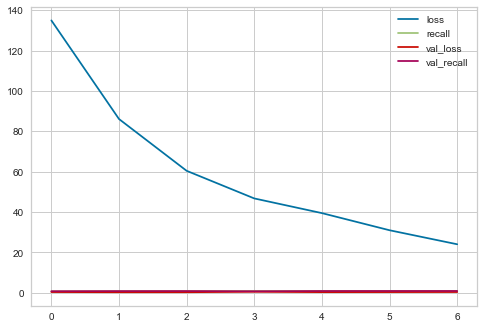

In [300]:
model_loss.plot();

In [301]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 26s 43ms/step - loss: 0.2321 - recall: 0.8933


[0.23209227621555328, 0.8933315277099609]

In [302]:
model.evaluate(X_test, y_test)  # restore_best_weights=True kullanıldığı için epoklardaki patiencce ın en iyi sonucunu getirdi

142/142 [==============================] - 8s 58ms/step - loss: 0.3191 - recall: 0.8622 0s - loss: 0.3166 - reca


[0.31908416748046875, 0.8622270226478577]

In [303]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")  # ture olanlar (0.5 ten büyük olanları) 1 e, false ları (0.5 ten küçükleri) 0 çevir.

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[ 3191    90]
 [ 1582 13249]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      3281
           1       0.99      0.89      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.83      0.93      0.87     18112
weighted avg       0.93      0.91      0.91     18112



In [304]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[ 699  121]
 [ 511 3198]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.85      0.69       820
           1       0.96      0.86      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529



### PREDICTION

In [342]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'Very comfortable, material is good, cut out on sleeves flattering'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [343]:
tokens = tokenizer.texts_to_sequences(reviews)  # bunları bi token e çevirdik. Bunları eğittiğim 15000 tokene göre sayısal veri ye dönüştürmem lazım.
                                                # tokenizer en fazla kullanılan ilk 15000 token e göre ayarlanmıştı. olmayanları zaten ignore ediliyordu.

In [344]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 103)

In [345]:
model.predict(tokens_pad)  # 0.5 ten büyük olanları olumlu, 0.5 ten küçük olanları olumsuz olarak yakalamış.

array([[0.7458245 ],
       [0.9654395 ],
       [0.8982428 ],
       [0.97660565],
       [0.978361  ],
       [0.33016726],
       [0.9728781 ],
       [0.04457915],
       [0.36342454],
       [0.5513942 ],
       [0.745423  ],
       [0.07863051],
       [0.3676262 ],
       [0.66041815]], dtype=float32)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

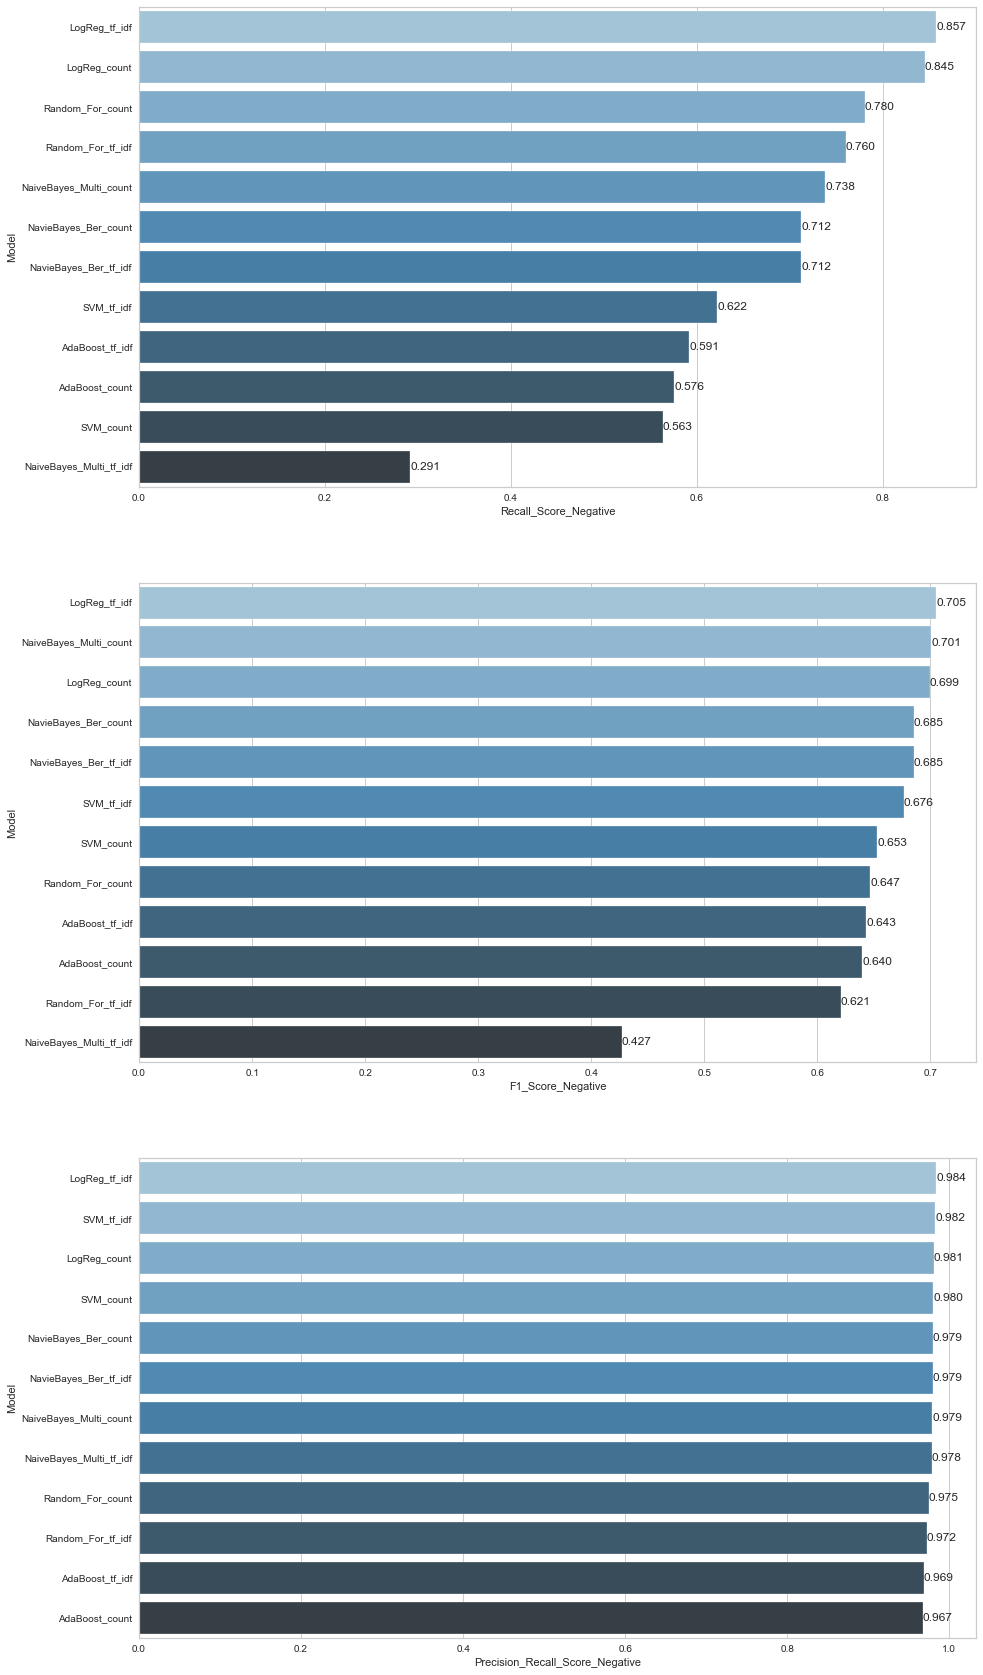

In [317]:
compare = pd.DataFrame({"Model": ["LogReg_count", "LogReg_tf_idf", "NaiveBayes_Multi_count", "NaiveBayes_Multi_tf_idf",
                                  "NavieBayes_Ber_count", "NavieBayes_Ber_tf_idf","SVM_count", "SVM_tf_idf", 
                                  "Random_For_count", "Random_For_tf_idf", "AdaBoost_count", "AdaBoost_tf_idf",
                                  ],
                        
                        "F1_Score_Negative": [log_count_f1_neg[0], log_tf_idf_f1_neg[0], nb_multi_count_f1_neg[0], nb_multi_tf_idf_f1_neg[0],
                                             nb_ber_count_f1_neg[0], nb_ber_tf_idf_f1_neg[0], svc_count_f1_neg[0], svc_tf_idf_f1_neg[0],
                                             rf_count_f1_neg[0], rf_tf_idf_f1_neg[0], ada_count_f1_neg[0], ada_tf_idf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [log_count_rec_neg[0], log_tf_idf_rec_neg[0], nb_multi_count_rec_neg[0], nb_multi_tf_idf_rec_neg[0], 
                                                  nb_ber_count_rec_neg[0], nb_ber_tf_idf_rec_neg[0], svc_count_rec_neg[0], svc_tf_idf_rec_neg[0], 
                                                  rf_count_rec_neg[0], rf_tf_idf_rec_neg[0], ada_count_rec_neg[0], ada_tf_idf_rec_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [log_AP_neg, log_tf_idf_AP_neg, nb_multi_count_AP_neg, nb_multi_tf_idf_AP_neg, 
                                                            nb_ber_count_AP_neg, nb_ber_tf_idf_AP_neg, svc_count_AP_neg, svc_tf_idf_AP_neg, 
                                                            rf_count_AP_neg, rf_tf_idf_AP_neg, ada_count_AP_neg, ada_tf_idf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___